In [88]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
sbn.set(style="whitegrid")
%matplotlib inline
from pandas import DataFrame, Series
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

The file had to be cleaned up before using it on MacOS

- ```dos2unix airline_tweets.csv```
- ```sed -i 's/,$//' airline_tweets.csv```

After that we can move forward and import it in Pandas

In [89]:
df = pd.read_csv('airline_tweets.csv', encoding = 'utf8')
df.dtypes

tweet_id            int64
tweet_created      object
name               object
tweet_location     object
retweet_count     float64
text               object
dtype: object

In [90]:
df.sample(5)

,tweet_id,tweet_created,name,tweet_location,retweet_count,text
11852,11853,23-2-2015 12:26,WhiteMule83,Boston. MA,0.0,@SouthwestAir @fox8news Serious potential for ...
11420,11421,23-2-2015 10:28,Malavayy,NaN,0.0,“@JetBlue: Our fleet's on fleek. http://t.co/H...
8916,8917,22-2-2015 15:46,bfriend10,Chicago,0.0,@AmericanAir ...is this how you want to treat ...
10856,10857,23-2-2015 7:28,christinphillip,Princeton. NJ,0.0,@united I am trying to make/change reservation...
7286,7287,22-2-2015 4:21,Marci_DZ,NaN,0.0,@USAirways wow.. Flight Cancelled Flightled. s...


In [92]:
df['tweet_location'].isnull().sum()

4813

In [93]:
df['text'].isnull().sum()

8

In [94]:
df['retweet_count'].describe().transpose()

count    14608.000000
mean         0.082694
std          0.746508
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         44.000000
Name: retweet_count, dtype: float64

## Starting to clean up the data

Converting all text to lower case and removing the characters the english disctionary does not have. This takes away  the some of the data. We need to remove extra characters like # from the hashtags unless we would like to do an explicit hashtag analyzis.

In case you would like to use non ascii characters in the text  http://stackoverflow.com/a/35723460/127508

- converting text to lowercase
- unicode -> str
- removing # (and potentiall other special characters)



In [95]:
df.count()

tweet_id          14616
tweet_created     14470
name              14616
tweet_location     9803
retweet_count     14608
text              14608
dtype: int64

In [96]:
#Lambdas for cleaning up 
df.count()
asci = lambda s: s.encode('ascii',errors='ignore') if isinstance(s, basestring) else s
lowe = lambda s: s.lower() if isinstance(s, basestring) else s
typ = lambda t: type(t)
df['lower'] = df['text'].apply(lowe)
df['ascii'] = df['lower'].apply(asci)
df.head()

,tweet_id,tweet_created,name,tweet_location,retweet_count,text,lower,ascii
0,1,16-2-2015 23:36,JetBlueNews,USA,0.0,@JetBlue's new CEO seeks the right balance to ...,@jetblue's new ceo seeks the right balance to ...,@jetblue's new ceo seeks the right balance to ...
1,2,16-2-2015 23:43,nesi_1992,undecided,0.0,@JetBlue is REALLY getting on my nerves !! 😡�...,@jetblue is really getting on my nerves !! 😡�...,@jetblue is really getting on my nerves !! #n...
2,3,16-2-2015 23:48,CPoutloud,Washington. DC,0.0,@united yes. We waited in line for almost an h...,@united yes. we waited in line for almost an h...,@united yes. we waited in line for almost an h...
3,4,16-2-2015 23:52,brenduch,NaN,0.0,@united the we got into the gate at IAH on tim...,@united the we got into the gate at iah on tim...,@united the we got into the gate at iah on tim...
4,5,17-2-2015 0:00,VahidESQ,Los Angeles. CA,0.0,@SouthwestAir its cool that my bags take a bit...,@southwestair its cool that my bags take a bit...,@southwestair its cool that my bags take a bit...


In [97]:
df[df['text'].isnull()].count()

tweet_id          8
tweet_created     0
name              8
tweet_location    0
retweet_count     0
text              0
lower             0
ascii             0
dtype: int64

In [98]:
df[df['text'].isnull()]

,tweet_id,tweet_created,name,tweet_location,retweet_count,text,lower,ascii
678,679,NaN,scatignani,NaN,NaN,NaN,NaN,NaN
2282,2283,NaN,edgarsantana,NaN,NaN,NaN,NaN,NaN
4027,4028,NaN,Mosborne13,NaN,NaN,NaN,NaN,NaN
4199,4200,NaN,ConnieBowman4,NaN,NaN,NaN,NaN,NaN
5628,5629,NaN,ohmal,NaN,NaN,NaN,NaN,NaN
7290,7291,NaN,traceyabbywhite,NaN,NaN,NaN,NaN,NaN
10568,10569,NaN,MrEschatologist,NaN,NaN,NaN,NaN,NaN
13290,13291,NaN,Pride_MMA,NaN,NaN,NaN,NaN,NaN


In [99]:
df.count()

tweet_id          14616
tweet_created     14470
name              14616
tweet_location     9803
retweet_count     14608
text              14608
lower             14608
ascii             14608
dtype: int64

In [104]:
#DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df.dropna(subset=['text'], inplace=True)
df[df['text'].isnull()].count()

tweet_id          0
tweet_created     0
name              0
tweet_location    0
retweet_count     0
text              0
lower             0
ascii             0
dtype: int64

In [105]:
df.count()

tweet_id          14608
tweet_created     14470
name              14608
tweet_location     9803
retweet_count     14608
text              14608
lower             14608
ascii             14608
dtype: int64

In [106]:
df.sample()

,tweet_id,tweet_created,name,tweet_location,retweet_count,text,lower,ascii
10500,10501,23-2-2015 4:55,geo3689,Frederick. MD,0.0,@SouthwestAir Me on one of your planes!!! Than...,@southwestair me on one of your planes!!! than...,@southwestair me on one of your planes!!! than...


In [107]:
#Removing what we don't need
for column in ['lower', 'text']:
    if column in df.columns:
        del df[column]
df.count()

tweet_id          14608
tweet_created     14470
name              14608
tweet_location     9803
retweet_count     14608
ascii             14608
dtype: int64

In [108]:
df.head()

,tweet_id,tweet_created,name,tweet_location,retweet_count,ascii
0,1,16-2-2015 23:36,JetBlueNews,USA,0.0,@jetblue's new ceo seeks the right balance to ...
1,2,16-2-2015 23:43,nesi_1992,undecided,0.0,@jetblue is really getting on my nerves !! #n...
2,3,16-2-2015 23:48,CPoutloud,Washington. DC,0.0,@united yes. we waited in line for almost an h...
3,4,16-2-2015 23:52,brenduch,NaN,0.0,@united the we got into the gate at iah on tim...
4,5,17-2-2015 0:00,VahidESQ,Los Angeles. CA,0.0,@southwestair its cool that my bags take a bit...


In [110]:
df['len']=df['ascii'].apply(len)
df.sample()

,tweet_id,tweet_created,name,tweet_location,retweet_count,ascii,len
11746,11747,23-2-2015 11:54,maccom,Denver,0.0,@americanair hour and a half after landing bag...,97


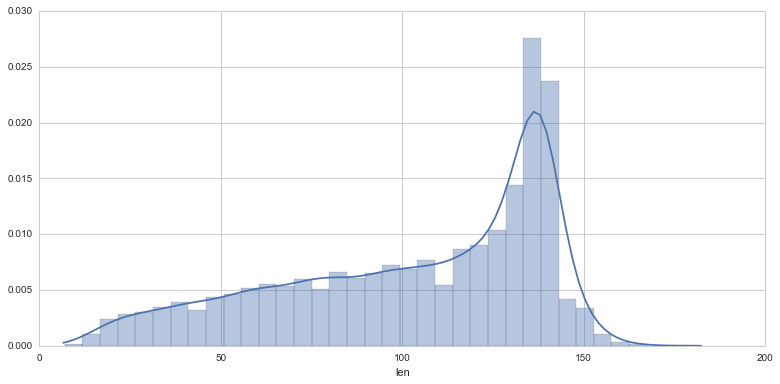

In [120]:
plt.figure(figsize=(13, 6))
sbn.distplot(df['len'])

In [122]:
df[(df.len < 15)]

,tweet_id,tweet_created,name,tweet_location,retweet_count,ascii,len
163,164,NaN,AndreybohdanY,NaN,0.0,@usairways,11
642,643,NaN,phil0616,NaN,0.0,@jetblue,9
661,662,NaN,phil0616,NaN,0.0,@jetblue,9
1191,1192,17-2-2015 18:40,Trufflebaby2,NaN,0.0,@jetblue sent,13
1496,1497,18-2-2015 4:50,philpete,London,0.0,@jetblue deal!,14
1641,1642,NaN,istackfranklins,NaN,0.0,@usairways,11
1676,1677,NaN,istackfranklins,NaN,0.0,@usairways,11
1904,1905,NaN,MusJew2daRescue,NaN,0.0,@usairways,11
2317,2318,18-2-2015 15:24,jesisforlovers,Oahu. Hi,0.0,@united sent,12
2394,2395,NaN,Joshua_Redman,NaN,0.0,@united,8


## Getting airline information

In [132]:
df['airline'] = df['ascii'].str.extract('@(?P<Airline>\w+)', expand=True)
df.sample()

,tweet_id,tweet_created,name,tweet_location,retweet_count,ascii,len,airline_clean,airline
11277,11278,23-2-2015 9:50,slippysam,lydham shropshire uk,0.0,@americanair you need to have a look at your h...,137,americanair,americanair


In [133]:
df['airline'].value_counts()

united             3800
usairways          2902
americanair        2748
southwestair       2414
jetblue            2212
virginamerica       503
nrhodes85             2
dadboner              1
deltaassist           1
catfoodbeerglue       1
scm1133               1
lindaswc              1
djevolutionhd         1
vanessaannz           1
ods1819               1
chasefoster           1
sb5551                1
eatgregeat            1
imaginedragons        1
sarahpompei           1
nytimes               1
kciairport            1
shannonwoodward       1
internjohnradio       1
albertbreer           1
mandarinjourney       1
timbennettg3          1
ninadavuluri          1
hillaconlin           1
andrewfallis          1
malhoit               1
melissaafrancis       1
Name: airline, dtype: int64

In [139]:
df['airline_clean'] = df['airline'].str.extract(
    '(usairways|americanair|jetblue|virginamerica|united|usairways|southwestair)', 
    expand=True)
df['airline_clean'].value_counts()

united           3800
usairways        2902
americanair      2748
southwestair     2414
jetblue          2212
virginamerica     503
Name: airline_clean, dtype: int64

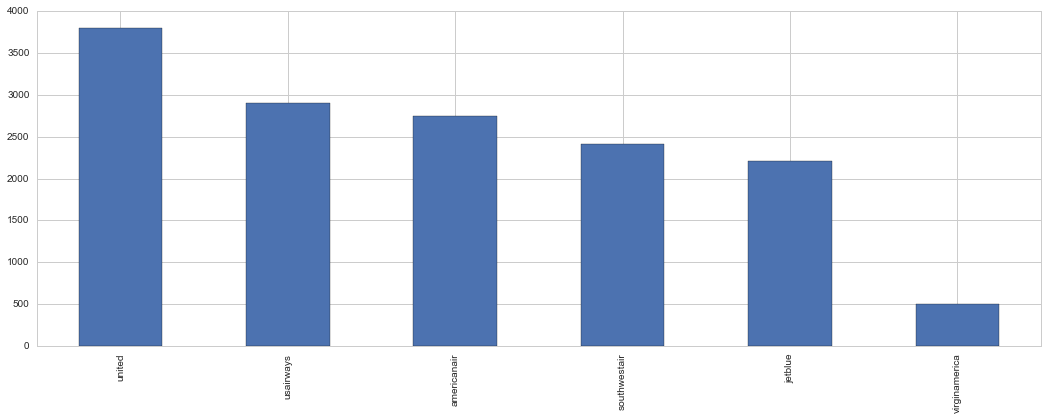

In [126]:
df['airline_clean'].value_counts().plot(kind='bar', stacked=True,figsize=(18,6))

In [141]:
if 'airline' in df.columns:
    del df['airline']  
df['airline_clean'].unique()

array(['jetblue', 'united', 'southwestair', 'usairways', 'virginamerica',
       nan, 'americanair'], dtype=object)

In [142]:
df.head()
df.count()

tweet_id          14608
tweet_created     14470
name              14608
tweet_location     9803
retweet_count     14608
ascii             14608
len               14608
airline_clean     14579
dtype: int64

In [143]:
df.sample()

,tweet_id,tweet_created,name,tweet_location,retweet_count,ascii,len,airline_clean
8467,8468,22-2-2015 13:57,emilyjoynoon,Los Angeles,0.0,@united--excited to barrel through the sky at ...,140,united


Removing @words move hashtags into a new column.

In [144]:
tags = lambda s: [tag.strip("#") for tag in s.split() if tag.startswith("#")]
df['tags'] = df['ascii'].apply(tags)
df.iloc[1010]

tweet_id                                                       1012
tweet_created                                       17-2-2015 16:46
name                                                AshleyMarie_TIU
tweet_location                                        HOOSiER STATE
retweet_count                                                     0
ascii             @southwestair what's up with these delays?! th...
len                                                             131
airline_clean                                          southwestair
tags                                 [southwest, southwestairlines]
Name: 1011, dtype: object

In [149]:
df.sample()

,tweet_id,tweet_created,name,tweet_location,retweet_count,ascii,len,airline_clean,tags
9894,9895,22-2-2015 20:13,scottychadwick,NaN,0.0,@united yea they been booked on 10 next avalib...,136,united,[hotelliving]


In [150]:
urls = lambda s: [url for url in s.split() if url.startswith("http://")]
df['urls'] = df['ascii'].apply(urls)
df.iloc[521]

tweet_id                                                        522
tweet_created                                       17-2-2015 12:03
name                                                somekidnamedjon
tweet_location                                                 ✈️✈️
retweet_count                                                     0
ascii             @jetblue i would love for you to fly my best f...
len                                                             102
airline_clean                                               jetblue
tags                                                             []
urls                                       [http://t.co/ch0nmjymgh]
Name: 521, dtype: object

In [151]:
df['ascii'] = df['ascii'].str.replace('(\.)?@(?P<Airline>\w+)', '')
df['ascii'] = df['ascii'].str.replace('#(?P<Tag>\w+)', '')
df['ascii'] = df['ascii'].str.replace('http://t.co/(?P<Url>\w+)', '')
df.sample()

,tweet_id,tweet_created,name,tweet_location,retweet_count,ascii,len,airline_clean,tags,urls
9830,9831,22-2-2015 19:45,zinnian0,NaN,0.0,line of 100+ people to rebook at mia now. vir...,137,americanair,[],[http://t.co/upaz1ef3dl]


In [152]:
df.iloc[521]

tweet_id                                                        522
tweet_created                                       17-2-2015 12:03
name                                                somekidnamedjon
tweet_location                                                 ✈️✈️
retweet_count                                                     0
ascii              i would love for you to fly my best friend ho...
len                                                             102
airline_clean                                               jetblue
tags                                                             []
urls                                       [http://t.co/ch0nmjymgh]
Name: 521, dtype: object

In [153]:
df.sample()

,tweet_id,tweet_created,name,tweet_location,retweet_count,ascii,len,airline_clean,tags,urls
12374,12375,23-2-2015 15:17,aliasboogie,New York City. NY,0.0,that's exactly the point. it fits. i'm premie...,138,united,[],[]


## Tweets with most hashtags

In [154]:
df['ctags'] = df['tags'].apply(len)

In [155]:
df.sample()

,tweet_id,tweet_created,name,tweet_location,retweet_count,ascii,len,airline_clean,tags,urls,ctags
13002,13003,23-2-2015 20:30,tracee28,Knoxville,0.0,done it! process initiated saturday morning. ...,140,usairways,[],[],0


Sorting by count

In [156]:
df.sort_values(by='ctags').tail(3)

,tweet_id,tweet_created,name,tweet_location,retweet_count,ascii,len,airline_clean,tags,urls,ctags
4839,4840,20-2-2015 11:57,southxnortheast,key west to bar harbor,2.0,saving my sanity. leaving it behind for sunsh...,135,jetblue,"[escape, fl, bliss, travel, indenial, whatfroz...",[http://t.co/6ttzejv3hy],6
8163,8164,22-2-2015 12:35,livingfitly,Washington. DC,0.0,home to in' back to !,116,virginamerica,"[flight, dc, sunset, globe, backtowinter, work...",[http://t.co/vx9vbctdlf],7
4416,4417,20-2-2015 7:49,SMHillman,New York. NY,0.0,gr8 crew on 123 to they're,115,jetblue,"[mint, flight, lax, mintalicious, truebluelove...",[],8


## Cleaning up tags

There is a lots of things we can remove from tags, starting with the airline names and the character "."

In [157]:
tt = df[df['ctags'] != 0]
ll = tt.tags.values.tolist()
llt = [item for sublist in ll for item in sublist]
llt = filter(lambda x: len(x)>0, llt)
r = re.compile('(jetblue|unitedairlines|usairways|united|americanairlines|\.)')
llt = [item for item in llt if not r.match(item)]

Using the new collection module from Python.

In [158]:
from collections import Counter
c = Counter(llt)
c.most_common(15)

[('destinationdragons', 76),
 ('fail', 63),
 ('customerservice', 34),
 ('neveragain', 26),
 ('disappointed', 23),
 ('avgeek', 22),
 ('travel', 21),
 ('badservice', 20),
 ('help', 19),
 ('badcustomerservice', 18),
 ('frustrated', 17),
 ('nothappy', 14),
 ('flyingitforward', 12),
 ('epicfail', 12),
 ('thankyou', 10)]

Generating tags by airline, using a simple function for cleaning up the data.

In [33]:
def gen_airline_tags(airline):
    tags = df[(df['ctags'] != 0) & (df['airline_clean'] == airline)].tags.values.tolist()
    #flatten
    llist = [item for sublist in tags for item in sublist]
    llist = filter(lambda x: len(x)>0, llist)
    r = re.compile('(jetblue|unitedairlines|usairways|united|americanairlines|virginamerica|\.)')
    llist = [item for item in llist if not r.match(item)]
    return llist

In [34]:
usairways_tags     = gen_airline_tags('usairways')
united_tags        = gen_airline_tags('united')              
americanair_tags   = gen_airline_tags('americanair')
southwestair_tags  = gen_airline_tags('southwestair')
jetblue_tags       = gen_airline_tags('jetblue')
virginamerica_tags = gen_airline_tags('virginamerica')  

ua_c = Counter(virginamerica_tags)
ua_c.most_common(15)

[('help', 4),
 ('cheapflights', 4),
 ('farecompare', 4),
 ('oscars2015', 3),
 ('oscars', 3),
 ('middleeast', 3),
 ('disappointed', 2),
 ('mayweatherpacquiao', 2),
 ('sanfrancisco', 2),
 ('austin', 2),
 ('moodlitmonday', 2),
 ('flight', 2),
 ('sciencebehindtheexperience', 2),
 ('dallas', 2),
 ('travel', 2)]

['tags', 'usairways_tags']


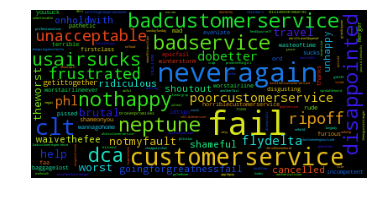

['united_tags', 'tags']


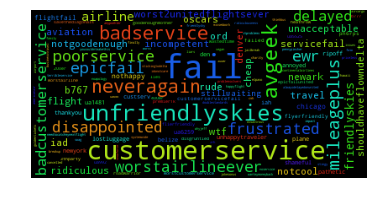

['americanair_tags', 'tags']


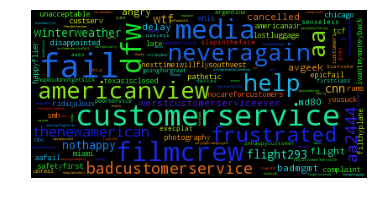

['southwestair_tags', 'tags']


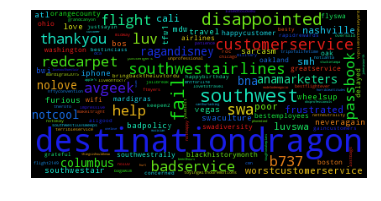

['jetblue_tags', 'tags']


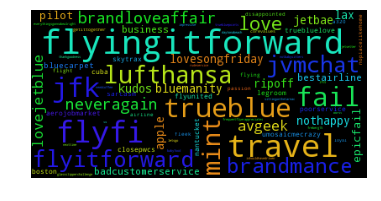

['tags', 'virginamerica_tags']


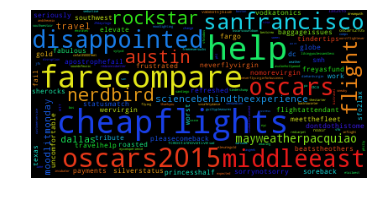

In [35]:
from wordcloud import WordCloud

def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

def gen_wc(tags):
    wc = WordCloud(max_font_size=40, relative_scaling=.5).generate(' '.join(tags))
    plt.figure()
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
    
tags_list = [usairways_tags, united_tags, americanair_tags, southwestair_tags, jetblue_tags, virginamerica_tags]

for tags in tags_list:
    n = namestr(tags, globals())
    print n
    gen_wc(tags)

## Using CoreNLP


Code for Deeply Moving: Deep Learning for Sentiment Analysis

http://stanfordnlp.github.io/CoreNLP/

http://nlp.stanford.edu/sentiment/code.html

In [161]:
df.to_csv('lines.csv', encoding='utf-8')

CoreNLP processing happens

In [176]:
df2 = pd.read_csv('out.csv', encoding = 'utf8')
df2.sample()

,Unnamed: 0,tweet_id,tweet_created,name,tweet_location,retweet_count,ascii,len,airline_clean,tags,urls,ctags,sentiment
5887,5892,5893,21-2-2015 8:18,observepeople,NaN,0.0,sean - keep in mind if you call...plan on be...,90,usairways,[],[],0,2


In [182]:
df2[['tweet_id','airline_clean','sentiment']].groupby(['airline_clean','sentiment']).agg(['count'])


tweet_id
                           count
airline_clean sentiment         
americanair   -1              14
               0              36
               1            1804
               2             722
               3             171
               4               1
jetblue       -1               2
               0               7
               1            1074
               2             868
               3             250
               4              11
southwestair  -1               4
               0              20
               1            1320
               2             829
               3             237
               4               4
united        -1               7
               0              74
               1            2467
               2            1026
               3             221
               4               5
usairways     -1               5
               0              62
               1            1962
               2             716
               3             155
               4               2
virginamerica -1               2
               0               2
               1             250
               2             180
               3              69

In [196]:
df3=df2[['tweet_id','airline_clean','sentiment']]
df_u = df3[(df3.airline_clean == 'united')]
df_u.sample()

,tweet_id,airline_clean,sentiment
10138,10145,united,2


In [201]:
grp = df_u.groupby(['sentiment']).agg(['count'])
grp

,tweet_id,airline_clean
,count,count
sentiment,,
-1,7,7
0,74,74
1,2467,2467
2,1026,1026
3,221,221
4,5,5


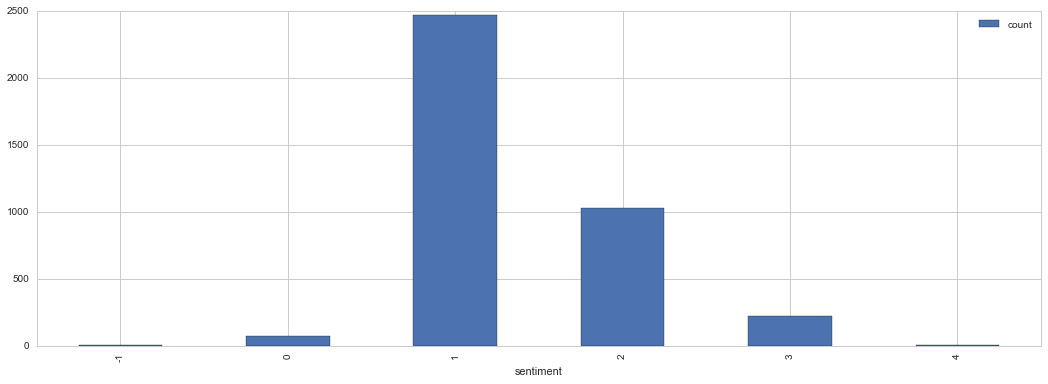

In [210]:
grp['tweet_id'].plot(kind='bar', stacked=True,figsize=(18,6))